In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from sklearn.preprocessing import MinMaxScaler

In [2]:
start = '2010-01-01'
end = '2022-09-23'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433318
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421423
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.464118


In [3]:
    df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-19,154.559998,149.100006,149.309998,154.479996,81474200.0,154.479996
2022-09-20,158.080002,153.080002,153.399994,156.899994,107689800.0,156.899994
2022-09-21,158.740005,153.600006,157.339996,153.720001,101696800.0,153.720001
2022-09-22,154.470001,150.910004,152.380005,152.740005,86652500.0,152.740005
2022-09-23,151.470001,148.559998,151.190002,150.429993,95939200.0,150.429993


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433318
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421423
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.464118


In [5]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


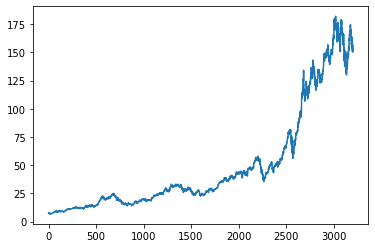

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0
...,...,...,...,...,...
3199,154.559998,149.100006,149.309998,154.479996,81474200.0
3200,158.080002,153.080002,153.399994,156.899994,107689800.0
3201,158.740005,153.600006,157.339996,153.720001,101696800.0
3202,154.470001,150.910004,152.380005,152.740005,86652500.0


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3199    152.2866
3200    152.2899
3201    152.1907
3202    152.1416
3203    152.0663
Name: Close, Length: 3204, dtype: float64

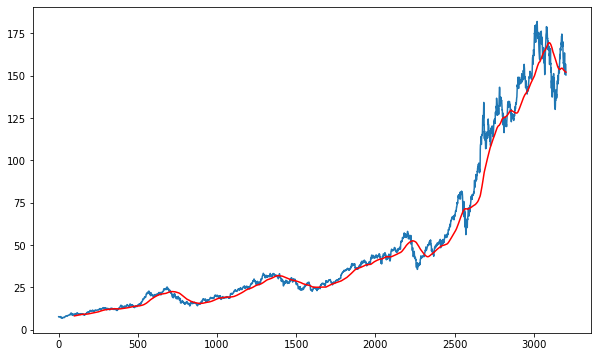

In [9]:
plt.figure(figsize = (10,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(100).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3199    152.2866
3200    152.2899
3201    152.1907
3202    152.1416
3203    152.0663
Name: Close, Length: 3204, dtype: float64

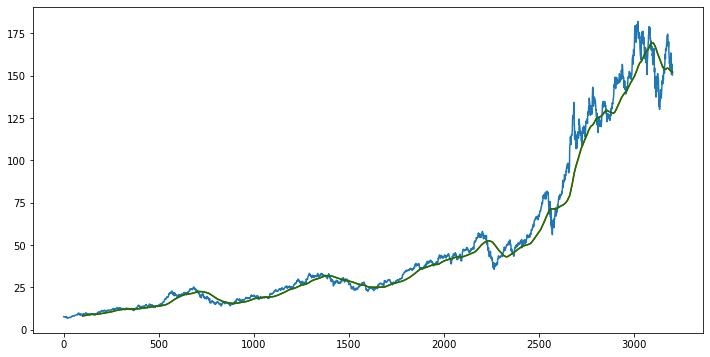

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(3204, 5)

In [13]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2242, 1)
(962, 1)


In [14]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [15]:
data_testing.head()

,Close
2242,45.235001
2243,44.887501
2244,44.645000
2245,46.205002
2246,44.172501


In [16]:
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.70786903],
       [0.7192552 ],
       [0.71739828]])

In [18]:
data_training_array.shape

(2242, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(2142, 100, 1)

In [21]:
#ML Model 

In [22]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
67/67 [==============================] - 24s 263ms/step - loss: 0.0261
Epoch 2/50
67/67 [==============================] - 26s 384ms/step - loss: 0.0065
Epoch 3/50
67/67 [==============================] - 25s 370ms/step - loss: 0.0059
Epoch 4/50
67/67 [==============================] - 19s 285ms/step - loss: 0.0054
Epoch 5/50
67/67 [==============================] - 19s 284ms/step - loss: 0.0050
Epoch 6/50
67/67 [==============================] - 20s 293ms/step - loss: 0.0043
Epoch 7/50
67/67 [==============================] - 27s 402ms/step - loss: 0.0041
Epoch 8/50
67/67 [==============================] - 20s 301ms/step - loss: 0.0035
Epoch 9/50
67/67 [==============================] - 18s 275ms/step - loss: 0.0038
Epoch 10/50
67/67 [==============================] - 22s 327ms/step - loss: 0.0032
Epoch 11/50
67/67 [==============================] - 21s 310ms/step - loss: 0.0032
Epoch 12/50
67/67 [==============================] - 19s 280ms/step - loss: 0.0032
Epoch 13/50
6

In [26]:
model.save('keras_model.h5')

In [27]:
data_testing.head()

,Close
2242,45.235001
2243,44.887501
2244,44.645000
2245,46.205002
2246,44.172501


In [ ]:
data_training.tail(100)

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [ ]:
final_df.head()

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

In [ ]:
 #Making Predictions
    
y_predicted = model.predict(x_test)  

In [ ]:
y_predicted.shape

In [ ]:
y_test

In [ ]:
y_predicted

In [ ]:
scaler.scale_

In [28]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

NameError: name 'y_test' is not defined

<Figure size 864x432 with 0 Axes>